<a href="https://colab.research.google.com/github/BALAJIHARIDASAN/Deep-Learning/blob/main/Activation_function_RElu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Activation function - It brings non linearity to the model

# Types

#sigmoid
# tanh
# relu
# leaky relu
# elu
# prelu
# selu
# softmax


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as seaborn
import os

In [6]:
x = np.linspace(-10,10,100)

In [7]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [8]:
len(x)

100

In [18]:
def derivative(f, x, delta_x=1e-6):
    return (f(x + delta_x) - f(x))/(delta_x)

def plot_graph(x, f,
               ALPHA=0.6, 
               label_x = r"$x \rightarrow$", label_y=r"$act(x), act'(x) \rightarrow$", 
               title=None,
               LABEL_Y=None,
               LABEL_Y_DASH=None,
               filepath_of_plot="plot.png"):
    y = f(x)
    y_dash = derivative(f, x)
    plt.figure(figsize=(10,8))
    plt.axhline(y=0, color="black", linestyle="--", lw=2)
    plt.axvline(x=0, color="black", linestyle="--", lw=2)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)

    if (LABEL_Y != None) and (LABEL_Y_DASH != None):
        plt.plot(x, y, alpha=ALPHA, label=LABEL_Y)
        plt.plot(x, y_dash, alpha=ALPHA, label=LABEL_Y_DASH)
        plt.legend(fontsize=14)

    else:
        plt.plot(x, y, alpha=ALPHA)
        plt.plot(x, y_dash, alpha=ALPHA)

    plt.savefig(filepath_of_plot)
      



In [19]:
def sine(X):
  return np.sin(X)

In [20]:
sine(3.14/2)

0.9999996829318346

In [21]:
root_plot_dir = "root"
os.makedirs(root_plot_dir, exist_ok=True)


In [27]:
def relu(x):
    return tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)

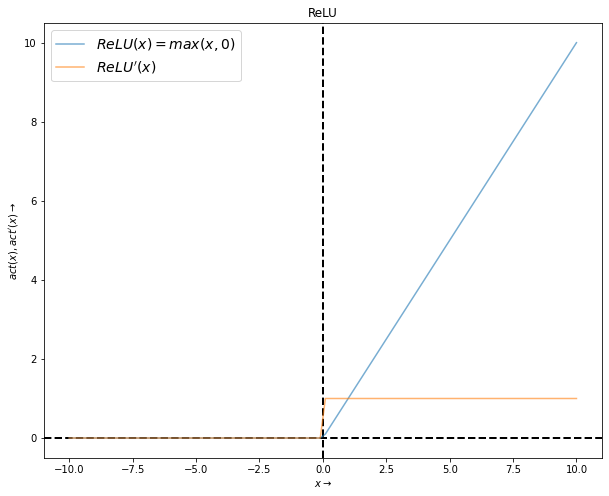

In [28]:
def plot_relu(x, path):
    plot_graph(x, f=relu, title="ReLU", 
            LABEL_Y=r"$ReLU(x)= max(x,0)$", 
            LABEL_Y_DASH=r"$ReLU^\prime(x)$", 
            filepath_of_plot=path)
plot_relu(x, os.path.join(root_plot_dir, "ReLU"))

The ReLU function is actually a function that takes the maximum value. Note that this is not fully interval-derivable, but we can take sub-gradient, as shown in the figure above. Although ReLU is simple, it is an important achievement in recent years.

The ReLU (Rectified Linear Unit) function is an activation function that is currently more popular. Compared with the sigmod function and the tanh function, it has the following advantages:

1. When the input is positive, there is no gradient saturation problem.

2. The calculation speed is much faster. The ReLU function has only a linear relationship (before and after 0 i.e. conditionally linear or piece wise linear). Whether it is forward or backward, it is much faster than sigmod and tanh. (Sigmod and tanh need to calculate the exponent, which will be slower.)

Disadvantages:

1. When the input is negative, ReLU is completely inactive, which means that once a negative number is entered, ReLU will die. In this way, in the forward propagation process, it is not a problem. Some areas are sensitive and some are insensitive. But in the backpropagation process, if you enter a negative number, the gradient will be completely zero, which has the same problem as the sigmod function and tanh function.

2. We find that the output of the ReLU function is either 0 or a positive number, which means that the ReLU function is not a 0-centric function.